1. Input the following data into a data frame called titanic, and display the entire data frame:
 Sex, Class, Survived, Died
 Children, First, 6, 0
 Children, Second, 24, 0
 Children, Third, 27, 52
 Men, First, 57, 118
 Men, Second, 14, 154
 Men, Third, 75, 387
 Men, Crew, 192, 693
 Women, First, 140, 4
 Women, Second, 80, 13
 Women, Third, 76, 89
 Women, Crew, 20, 3 


In [1]:
import pandas as pd
import numpy as np

#Hard-coded data for output represents the sales per 5 months for 3 types of cars 
titanic = {'Sex':['Children','Children','Children','Men','Men','Men','Men','Women','Women','Women','Women'], 
                'Class' : ['First','Second','Third','First','Second','Third','Crew','First','Second','Third','Crew'], 
                'Survived': [6,24,27,57,14,75,192,140,80,76,20], 
                'Died':[0,0,52,118,154,387,693,4,13,89,3]}

#Creates a data frame with the correct order of columns 
df = pd.DataFrame(titanic,columns=["Sex","Class","Survived","Died"])

#Prints out the table
print(df)

         Sex   Class  Survived  Died
0   Children   First         6     0
1   Children  Second        24     0
2   Children   Third        27    52
3        Men   First        57   118
4        Men  Second        14   154
5        Men   Third        75   387
6        Men    Crew       192   693
7      Women   First       140     4
8      Women  Second        80    13
9      Women   Third        76    89
10     Women    Crew        20     3


2. Now only show the data of the people in first class.

In [2]:
print(df[df["Class"]=="First"])

        Sex  Class  Survived  Died
0  Children  First         6     0
3       Men  First        57   118
7     Women  First       140     4


3. Delete the crew members from the data.

In [3]:
df = df[(df['Class'] != 'Crew')]
df

,Sex,Class,Survived,Died
0,Children,First,6,0
1,Children,Second,24,0
2,Children,Third,27,52
3,Men,First,57,118
4,Men,Second,14,154
5,Men,Third,75,387
7,Women,First,140,4
8,Women,Second,80,13
9,Women,Third,76,89


4. Create a new column that is the total number of people for that group (those who survived + died).

In [4]:
df["Total Passenger"]= df["Survived"]+df["Died"]
df

,Sex,Class,Survived,Died,Total Passenger
0,Children,First,6,0,6
1,Children,Second,24,0,24
2,Children,Third,27,52,79
3,Men,First,57,118,175
4,Men,Second,14,154,168
5,Men,Third,75,387,462
7,Women,First,140,4,144
8,Women,Second,80,13,93
9,Women,Third,76,89,165


5. Create a new column with the percentage of people who survived.

In [5]:
df["Percentage of Survived"] =round((df["Survived"]/df["Total Passenger"])*100,2)
df

,Sex,Class,Survived,Died,Total Passenger,Percentage of Survived
0,Children,First,6,0,6,100.00
1,Children,Second,24,0,24,100.00
2,Children,Third,27,52,79,34.18
3,Men,First,57,118,175,32.57
4,Men,Second,14,154,168,8.33
5,Men,Third,75,387,462,16.23
7,Women,First,140,4,144,97.22
8,Women,Second,80,13,93,86.02
9,Women,Third,76,89,165,46.06


6. Delete the column indicating the total number of people in that group.


In [6]:
df = df.drop("Total Passenger",axis = 1)
df

,Sex,Class,Survived,Died,Percentage of Survived
0,Children,First,6,0,100.00
1,Children,Second,24,0,100.00
2,Children,Third,27,52,34.18
3,Men,First,57,118,32.57
4,Men,Second,14,154,8.33
5,Men,Third,75,387,16.23
7,Women,First,140,4,97.22
8,Women,Second,80,13,86.02
9,Women,Third,76,89,46.06


7. Only show the rows where more than 80% of the people survived.

In [7]:
print(df[df["Percentage of Survived"] > 80.0])

        Sex   Class  Survived  Died  Percentage of Survived
0  Children   First         6     0                  100.00
1  Children  Second        24     0                  100.00
7     Women   First       140     4                   97.22
8     Women  Second        80    13                   86.02


8. Then only show the rows where less than 40% of the people survived

In [8]:
print(df[df["Percentage of Survived"] < 40.0])

        Sex   Class  Survived  Died  Percentage of Survived
2  Children   Third        27    52                   34.18
3       Men   First        57   118                   32.57
4       Men  Second        14   154                    8.33
5       Men   Third        75   387                   16.23



9. Calculate the total number of people that survived and died for each class, then report the percentages. (Hint: Use a grouped calculation.)


In [9]:
##This can also be done in one line
groupedDied = df.groupby('Class')['Died'].sum()
groupedSurvived = df.groupby('Class')['Survived'].sum()
groupedTotal = groupedDied+groupedDied
PerDied = (groupedDied/groupedTotal)*100
PerSur = (groupedSurvived/groupedTotal)*100
print(PerDied)
print(PerSur)

Class
First     50.0
Second    50.0
Third     50.0
Name: Died, dtype: float64
Class
First     83.196721
Second    35.329341
Third     16.856061
dtype: float64


10. Save your table in CSV format (as e.g. titanic_data.csv) with the first line as headers for the columns.

In [10]:
df.to_csv('titanic_data.csv',encoding='utf-8', index=False)

11. Duplicate the CSV file on your computer since you will be editing the copied version (e.g. titanic_data2.csv). Open the new CSV file in a text editor. Note the way the data is organized. Now, in the text editor, add new lines including the data for the crew that was removed earlier. (Help: the percentage of male crew and female crew that survived was 21.69% and 86.96%.)

In [11]:
df.to_csv('D:\\Courses\\BigData\\titanic_data3.csv',encoding='utf-8', index=False)

12. Now read that updated CSV file into a new data frame called titanic2, and display the data.

In [12]:
df2 = pd.read_csv('D:\\Courses\\BigData\\titanic_data3.csv')
print(df2)

        Sex   Class  Survived  Died  Percentage of Survived
0  Children   First         6     0                  100.00
1  Children  Second        24     0                  100.00
2  Children   Third        27    52                   34.18
3       Men   First        57   118                   32.57
4       Men  Second        14   154                    8.33
5       Men   Third        75   387                   16.23
6     Women   First       140     4                   97.22
7     Women  Second        80    13                   86.02
8     Women   Third        76    89                   46.06


1. Open the file in a text editor while you read over the column names in the data file details at the end of this assignment.

2. Read the text file in as a dataframe. And then print it to make sure it read in correctly. Keep in mind this can be a tricky, error-prone problem depending on the formatting of the data file.


In [63]:
h = ['age','sex','chest_pain','bp','chol','sugar','ecg','heart_rate','angina','oldpeak','slope','vessel','thal','disease']
df = pd.read_csv('D:\\Courses\\BigData\\heart.csv',delimiter=' ')
df.shape

(269, 14)

In [64]:
df1 = pd.DataFrame(df.values , 
                   columns = h)
df1

,age,sex,chest_pain,bp,chol,sugar,ecg,heart_rate,angina,oldpeak,slope,vessel,thal,disease
0,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
1,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
2,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
3,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0
4,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1.0
265,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1.0
266,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1.0
267,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1.0


3. Now let’s get a sense of the ages of the people. First print only the ages of the patients by selecting only that column. Then calculate the mean and standard deviation of the ages.


In [68]:
df1["age"]

0      67.0
1      57.0
2      64.0
3      74.0
4      65.0
       ... 
264    52.0
265    44.0
266    56.0
267    57.0
268    67.0
Name: age, Length: 269, dtype: float64

In [69]:
df1["age"].mean()

54.37546468401487

0      67.0
1      57.0
2      64.0
3      74.0
4      65.0
       ... 
264    52.0
265    44.0
266    56.0
267    57.0
268    67.0
Name: age, Length: 269, dtype: float64


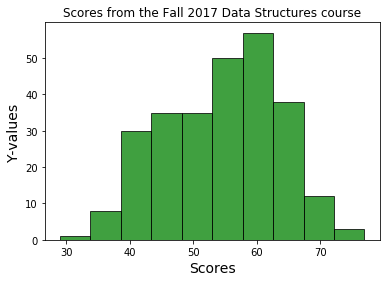

In [87]:
import numpy as np
import matplotlib.pyplot as plt
x = df1['age']
num_bins =10
n, bins, patches = plt.hist(x, num_bins, facecolor='green', alpha=0.75, edgecolor='black')

plt.title('Scores from the Fall 2017 Data Structures course')
plt.xlabel('Scores',fontsize=14)
plt.ylabel('Y-values',fontsize=14)
plt.savefig("D:\Courses\BigData\histogram.pdf",bbox_inches='tight') 
plt.savefig("D:\Courses\BigData\histogram.png",bbox_inches='tight') 
plt.show()

In [70]:
df1["age"].std()

9.076186256688375

4. Create a data frame called young_df with all the people below 55 years old. Similarly, create a data frame called old_df with everyone at or above 55 years old. Now calculate the mean age, blood pressure, cholesterol, and heart rate for both groups and note the trend as people age.


In [73]:
young_df = df1[df1["age"] < 55]
old_df = df1[df1["age"] >= 55]
young_df

,age,sex,chest_pain,bp,chol,sugar,ecg,heart_rate,angina,oldpeak,slope,vessel,thal,disease
10,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,1.0
11,44.0,1.0,3.0,140.0,235.0,0.0,2.0,180.0,0.0,0.0,1.0,0.0,3.0,1.0
15,46.0,1.0,4.0,140.0,311.0,0.0,0.0,120.0,1.0,1.8,2.0,2.0,7.0,2.0
16,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,2.0
18,40.0,1.0,1.0,140.0,199.0,0.0,0.0,178.0,1.0,1.4,1.0,0.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,1.0
262,49.0,1.0,2.0,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,3.0,1.0
263,48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0,2.0
264,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1.0


5. Using all the data, let’s try to see if there tend to be overall differences between people with heart disease and people without it. Find the mean age, blood pressure, cholesterol, and max heart rate for people with heart disease, and separately for the people without heart disease. This can be done easily using a grouping method for your data frame. Note the trend in each of these between people with heart disease and those without.

In [79]:
without_disease = df1[df1["disease"] == 1]
print('Age mean ',without_disease['age'].mean())
print('Bp mean ',without_disease['bp'].mean())
print('Chol mean ',without_disease['chol'].mean())
print('heart rate ',without_disease['heart_rate'].mean())

Age mean  52.70666666666666
Bp mean  128.86666666666667
Chol mean  244.21333333333334
heart rate  158.33333333333334


In [80]:
with_disease = df1[df1["disease"] == 2]
print('Age mean ',with_disease['age'].mean())
print('Bp mean ',with_disease['bp'].mean())
print('Chol mean ',with_disease['chol'].mean())
print('heart rate ',with_disease['heart_rate'].mean())

Age mean  56.47899159663866
Bp mean  134.47899159663865
Chol mean  255.91596638655463
heart rate  139.109243697479
